### Solucion de Predicción de enfermedades coronarias

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, f1_score


In [28]:

df_train = pd.read_csv('prediccion-de-sufrir-enfermedades-coronarias/train.csv')
print(df_train.head())

   CHD_OR_MI  SEX  AGE  HEALTH  PHYSICAL_HEALTH  MENTAL_HEALTH  \
0        1.0    1   34     1.0              1.0            2.0   
1        0.0    1   76     1.0              1.0            1.0   
2        1.0    2   69     1.0              1.0            1.0   
3        1.0    2   36     1.0              1.0            1.0   
4        1.0    2   21     1.0              1.0            2.0   

   PHYSICAL_ACTIVITIES  BLOOD_PRESSURE  HIGH_CHOLESTEROL  SKIN_CANCER  ...  \
0                  1.0             1.0               2.0          2.0  ...   
1                  2.0             2.0               1.0          1.0  ...   
2                  2.0             2.0               2.0          2.0  ...   
3                  1.0             1.0               2.0          2.0  ...   
4                  1.0             1.0               1.0          2.0  ...   

   SMOKE  TABACCO_PRODUCTS  E_CIGARETTES  HEAVY_DRINKERS  HIV  FRUITS  \
0    2.0               3.0           3.0             1.0  2.0

## Eliminamos los valores nulos y filas duplicadas

In [29]:

df_train_cleaned = df_train.dropna()

df_train_cleaned = df_train_cleaned.drop_duplicates()

print(df_train_cleaned.head())

   CHD_OR_MI  SEX  AGE  HEALTH  PHYSICAL_HEALTH  MENTAL_HEALTH  \
0        1.0    1   34     1.0              1.0            2.0   
4        1.0    2   21     1.0              1.0            2.0   
5        1.0    2   44     1.0              1.0            1.0   
6        1.0    2   43     1.0              1.0            1.0   
7        1.0    2   56     1.0              1.0            1.0   

   PHYSICAL_ACTIVITIES  BLOOD_PRESSURE  HIGH_CHOLESTEROL  SKIN_CANCER  ...  \
0                  1.0             1.0               2.0          2.0  ...   
4                  1.0             1.0               1.0          2.0  ...   
5                  1.0             1.0               1.0          2.0  ...   
6                  1.0             1.0               1.0          2.0  ...   
7                  1.0             2.0               1.0          2.0  ...   

   SMOKE  TABACCO_PRODUCTS  E_CIGARETTES  HEAVY_DRINKERS  HIV  FRUITS  \
0    2.0               3.0           3.0             1.0  2.0

## Normalizamos los datos

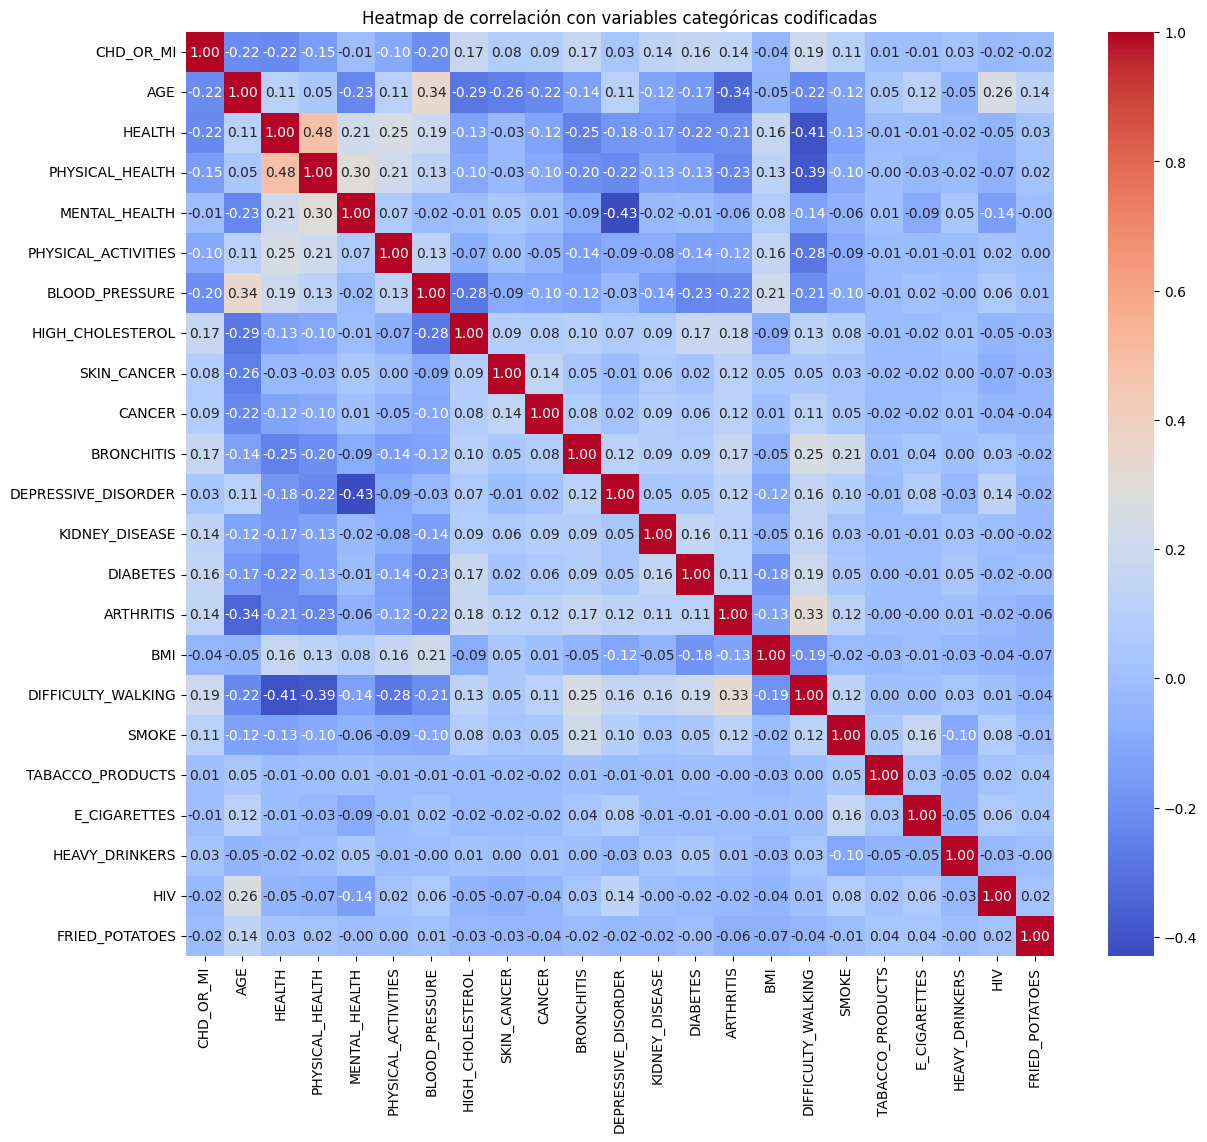

In [30]:

categorical_cols = ['SEX', 'ETHNICITY', 'FRUITS', 'VEGETABLES']
df_train_encoded = pd.get_dummies(df_train_cleaned, columns=categorical_cols, drop_first=True)

df_numeric_encoded = df_train_encoded.select_dtypes(include=[np.number])

correlation_matrix = df_numeric_encoded.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de correlación con variables categóricas codificadas")
plt.show()

Despues de analizar el mapa de calor, las variables que voy mantener son todas excepto: "HIGH_CHOLESTEROL","BRONCHITIS","KIDNEY_DISEASE","DIABETES","ARTHRITIS","DIFFICULTY_WALKING", la caractersitica a predecir o la carcteristica objetivo es CHD_OR_MI.

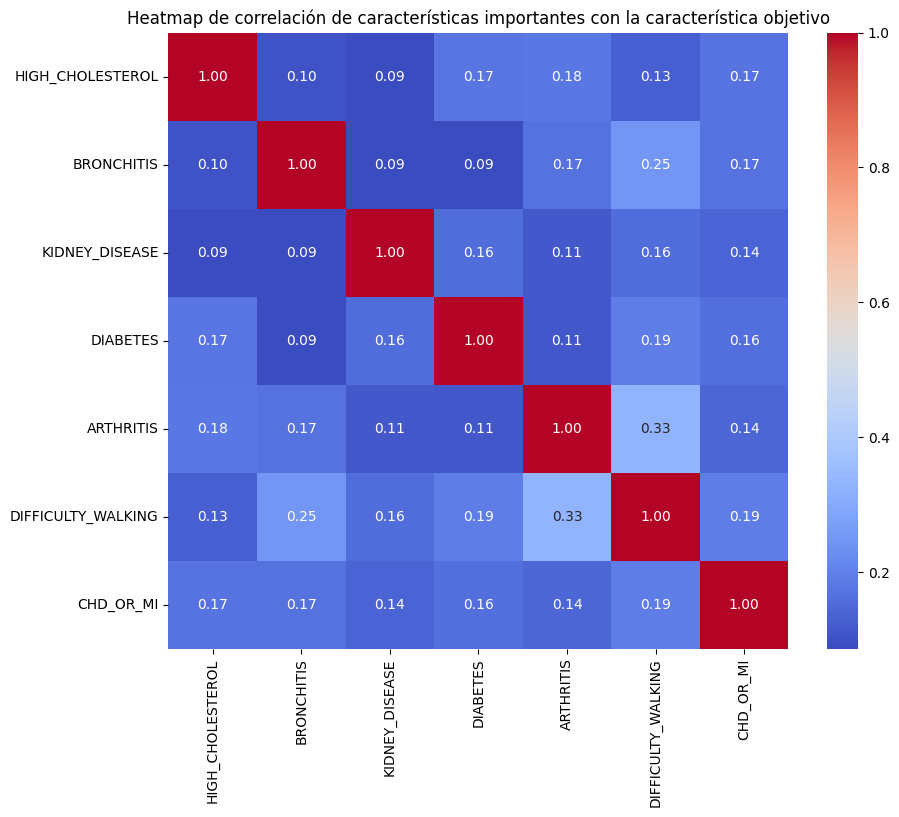

In [31]:
features_importants = ["HIGH_CHOLESTEROL","BRONCHITIS","KIDNEY_DISEASE","DIABETES","ARTHRITIS","DIFFICULTY_WALKING"]
feature_objetivo= "CHD_OR_MI"

features_to_keep = features_importants + [feature_objetivo]
df_filtered = df_train_encoded[features_to_keep]

correlation_matrix_filtered = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de correlación de características importantes con la característica objetivo")
plt.show()


In [32]:

X = df_filtered[features_importants]
y = df_filtered[feature_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9117792713123453
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.01      0.03      3742
         1.0       0.91      1.00      0.95     38663

    accuracy                           0.91     42405
   macro avg       0.71      0.51      0.49     42405
weighted avg       0.88      0.91      0.87     42405



In [33]:

df_test_public = pd.read_csv('prediccion-de-sufrir-enfermedades-coronarias/test_public.csv')
print(df_test_public.head())

df_test_public_cleaned = df_test_public.dropna()
df_test_public_cleaned = df_test_public_cleaned.drop_duplicates()

df_test_public_encoded = pd.get_dummies(df_test_public_cleaned, columns=categorical_cols, drop_first=True)

df_test_filtered = df_test_public_encoded[features_importants]

y_test_public_pred = clf.predict(df_test_filtered)

print(y_test_public_pred)

   CHD_OR_MI  SEX  AGE  HEALTH  PHYSICAL_HEALTH  MENTAL_HEALTH  \
0        1.0    2   70     1.0              1.0            1.0   
1        1.0    1   32     1.0              3.0            2.0   
2        1.0    1   69     1.0              1.0            1.0   
3        1.0    1   36     1.0              1.0            1.0   
4        1.0    1   63     1.0              2.0            1.0   

   PHYSICAL_ACTIVITIES  BLOOD_PRESSURE  HIGH_CHOLESTEROL  SKIN_CANCER  ...  \
0                  1.0             2.0               1.0          1.0  ...   
1                  1.0             1.0               2.0          2.0  ...   
2                  1.0             2.0               2.0          2.0  ...   
3                  1.0             1.0               2.0          2.0  ...   
4                  1.0             2.0               1.0          2.0  ...   

   SMOKE  TABACCO_PRODUCTS  E_CIGARETTES  HEAVY_DRINKERS  HIV  FRUITS  \
0    1.0               3.0           3.0             1.0  2.0

In [34]:
accuracy = accuracy_score(df_test_public_cleaned[feature_objetivo], y_test_public_pred)
f1 = f1_score(df_test_public_cleaned[feature_objetivo], y_test_public_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.91661656395611
F1 Score: 0.9564346716403259


## Probando con datos de test privados y publicos

In [35]:
df_test_public = pd.read_csv('prediccion-de-sufrir-enfermedades-coronarias/test_public.csv')
df_test_private = pd.read_csv('prediccion-de-sufrir-enfermedades-coronarias/test_private.csv')

df_test_public_encoded = pd.get_dummies(df_test_public, columns=categorical_cols, drop_first=True)
df_test_private_encoded = pd.get_dummies(df_test_private, columns=categorical_cols, drop_first=True)

df_test_public_filtered = df_test_public_encoded[features_importants]
df_test_private_filtered = df_test_private_encoded[features_importants]

y_test_public_pred = clf.predict(df_test_public_filtered)
y_test_private_pred = clf.predict(df_test_private_filtered)

result_public = pd.DataFrame({
    'ID': df_test_public['ID'],
    'CHD_OR_MI': y_test_public_pred
})

result_private = pd.DataFrame({
    'ID': df_test_private['ID'],
    'CHD_OR_MI': y_test_private_pred
})

final_results = pd.concat([result_public, result_private])

final_results.to_csv('resultados.csv', index=False)

